## Online Shoppers Purchasing Intention Dataset Data Set


### Abstract

Abstract: Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

link: https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

In [1]:
import math

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/online.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- `Administrative`, `Administrative_Duration`, `Informational`, `Informational_Duration`, `ProductRelated`, `ProductRelated_Duration`: 해당 세션에서 방문자가 방문한 다양한 유형의 페이지 수와 각 페이지에서 보낸 총 시간을 나타냅니다. 이 페이지 카테고리. 이러한 기능의 값은 사용자가 방문한 페이지의 URL 정보에서 파생되며 사용자가 한 페이지에서 다른 페이지로 이동하는 등의 작업을 수행할 때 실시간으로 업데이트됩니다.
- `BounceRates`, `ExitRates`, `PageValues`: Google Analytics에서 측정한 값
- `BounceRates`: 이탈률. 해당 페이지에서 사이트에 들어간 다음 해당 세션 동안 분석 서버에 대한 다른 요청을 보내지 않고 나가는(Bounce) 방문자의 비율
- `ExitRates`: 해당 페이지에 대한 모든 페이지뷰, 즉 세션의 마지막에 있었던 비율.
- `PageValues`: 사용자가 전자 상거래를 완료하기 전에 방문한 웹 페이지의 평균 값
- `SpecialDay`: 세션이 거래로 마무리될 가능성이 높은 특별한 날에 사이트 방문 시간이 얼마나 가까운지
- `Month`: 방문 달
- `OperatingSystem`: 운영체제
- `Browser`: 웹 브라우저
- `Region`: 지역
- `TrafficType`: 트래픽 유형
- `VisitorType`: 재방문 혹은 신규 방문자
- `Weekend`: 주말인지
- `Revenue`: 수익 여부

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
num_idx = list(range(10))
df.iloc[:, num_idx].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


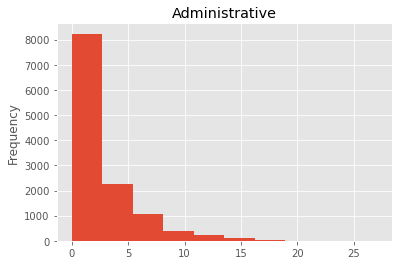

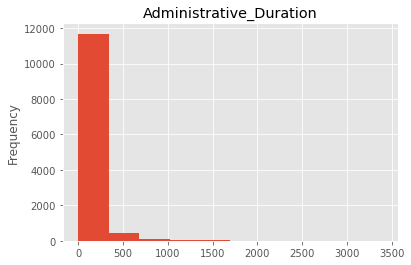

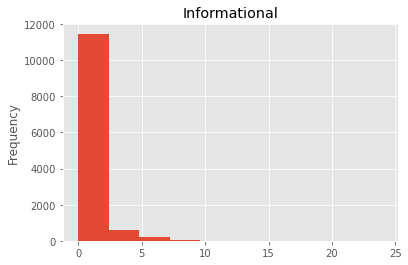

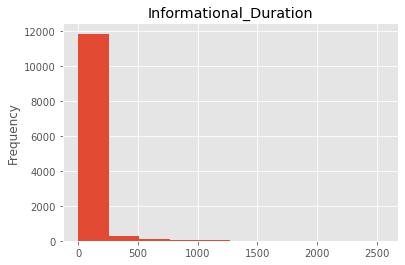

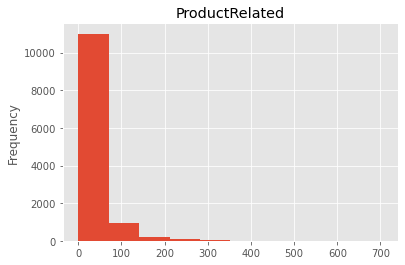

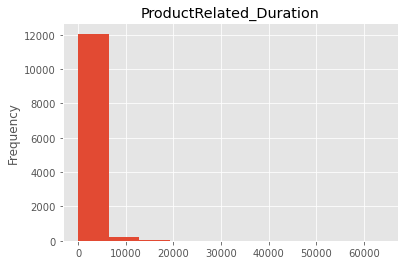

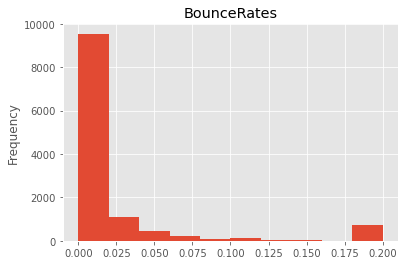

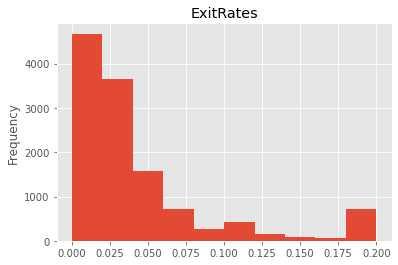

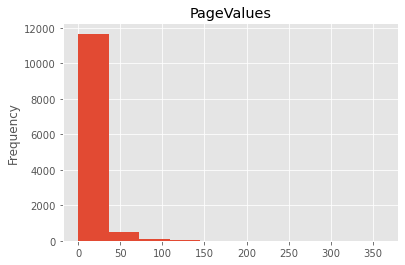

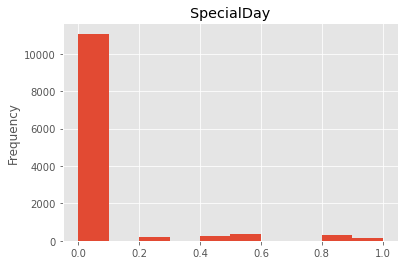

In [5]:
for col in num_idx:
    df.iloc[:, col].plot.hist(title=df.iloc[:, col].name);
    plt.show()

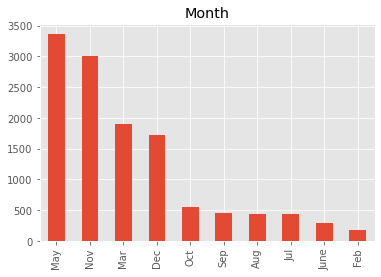

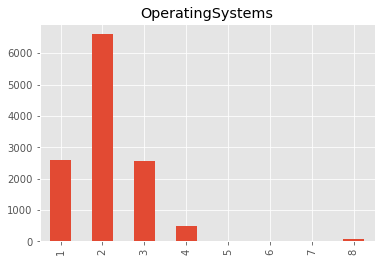

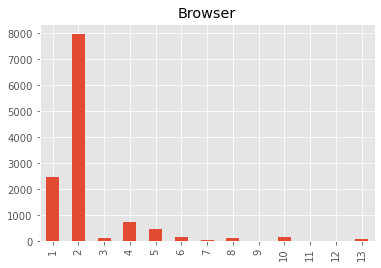

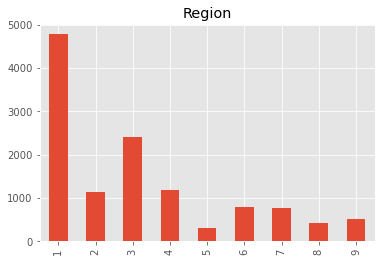

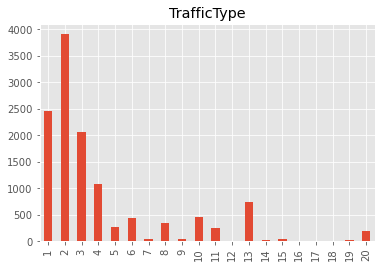

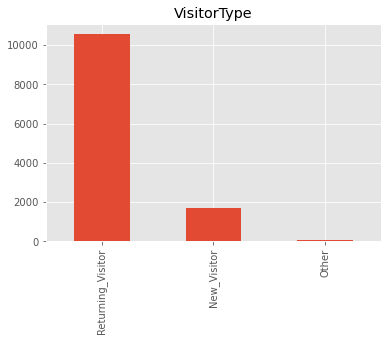

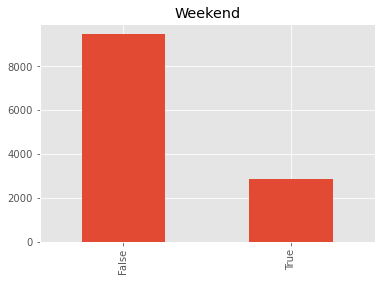

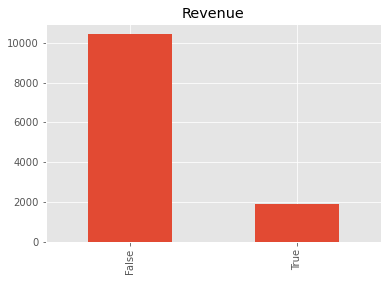

In [6]:
cat_idx = list(set(range(df.shape[1])) - set(num_idx))
for col in cat_idx:
    df.iloc[:, col].value_counts().plot.bar(title=df.iloc[:, col].name)
    plt.show()

### Analysis

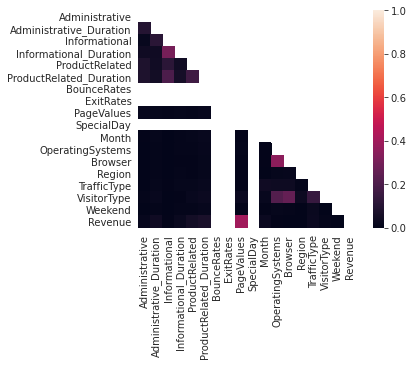

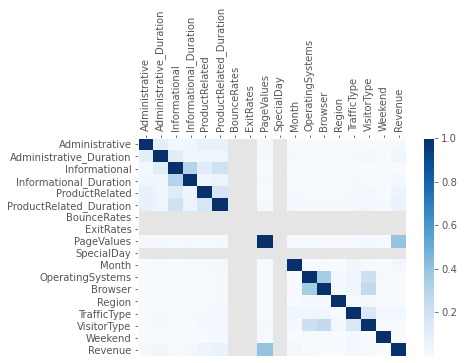

In [7]:
def discretize(x):
    if x < 2:
        return str(1)
    return str(int(math.log(x, 2) ** 2))

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

df_disc = df.copy()

disc_values = {}
for col in num_idx:
    results = []
    for value in df_disc.iloc[:, col]:
        results.append(discretize(value))
    disc_values[col] = results

disc_values = pd.DataFrame(disc_values).values
df_disc.iloc[:, num_idx] = disc_values
df_disc = df_disc.astype('object')

n_col = df_disc.shape[1]

cramer_v_matrix = [[] for _ in range(n_col)]

for i in range(n_col):
    for j in range(n_col):
        cramer_v_matrix[i].append(cramers_V(df_disc.iloc[:, i], df_disc.iloc[:, j]))

cramer_v_matrix = pd.DataFrame(cramer_v_matrix, index=df_disc.columns, columns=df_disc.columns)

mask = np.zeros_like(cramer_v_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    ax = sns.heatmap(cramer_v_matrix, mask=mask, vmin=0., vmax=1., square=True)

plt.show()

fig, ax = plt.subplots()
heatmap = ax.pcolor(cramer_v_matrix, cmap=plt.cm.Blues)
cb = ax.figure.colorbar(heatmap, ax=ax)

ax.set_xticks(np.arange(cramer_v_matrix.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(cramer_v_matrix.shape[0]) + 0.5, minor=False)

ax.set_xlim(0, int(cramer_v_matrix.shape[1]))
ax.set_ylim(0, int(cramer_v_matrix.shape[0]))

ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(cramer_v_matrix.columns)
ax.set_yticklabels(cramer_v_matrix.columns)

plt.xticks(rotation=90)
plt.show()